# Credit Card Fraud Detection

Fraud detection is the process of identifying and preventing unauthorized or deceptive financial transactions, such as credit card fraud. It is a critical task for banks and payment systems because detecting fraudulent activity early helps minimize financial losses, protect customers, and maintain trust in digital financial services. For this analysis, I used the [Credit Card Fraud Detection Dataset (2023)](https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023?resource=download), which contains anonymized transactions labeled as fraudulent or non-fraudulent. This dataset provides a realistic scenario to explore patterns of fraud, perform feature engineering, and develop predictive models capable of identifying potentially fraudulent transactions. Building accurate models on this data can assist in automating fraud detection and improving security in financial systems.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = pd.read_csv('/Users/ruhanimittal/data analysis/creditcard_2023.csv')
data

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


## Preliminary analysis

In [3]:
missing_values = data.isnull().sum()
print(missing_values)

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


/var/folders/qz/t7f9m7_116x181zymmq5lr940000gn/T/ipykernel_70120/292632891.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette='Set2')


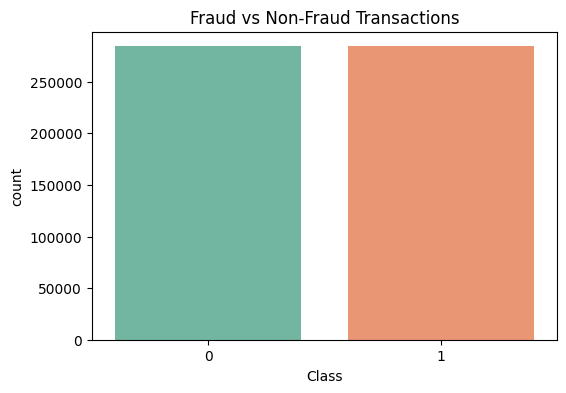

Fraudulent Transactions: 50.000%


In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data, palette='Set2')
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

fraud_rate = data['Class'].mean() * 100
print(f"Fraudulent Transactions: {fraud_rate:.3f}%")

This bar plot shows the overall distribution of fraudulent and non-fraudulent transactions. Since the dataset is balanced, both classes appear in nearly equal proportions, with fraudulent transactions making up about 50%. This is unusual compared to real-world datasets, where fraud is typically rare, but in this case, it ensures a fairer comparison between the two classes during analysis and modeling.

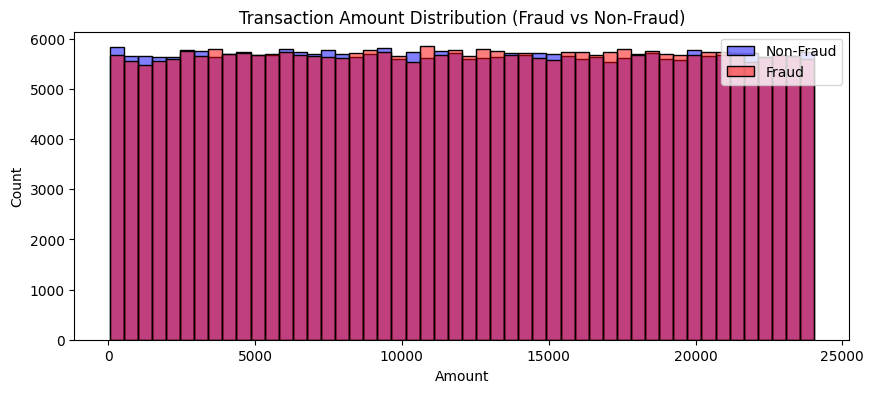

In [5]:
plt.figure(figsize=(10,4))
sns.histplot(data[data['Class']==0]['Amount'], bins=50, color='blue', label='Non-Fraud', alpha=0.5)
sns.histplot(data[data['Class']==1]['Amount'], bins=50, color='red', label='Fraud', alpha=0.5)
plt.legend()
plt.title("Transaction Amount Distribution (Fraud vs Non-Fraud)")
plt.show()

The graph illustrates the distribution of transaction amounts. Most transactions occur at lower values, and as the amount increases, the frequency of transactions decreases. This suggests that small-value transactions dominate the dataset, while high-value ones are relatively uncommon, regardless of whether they are fraud or not.

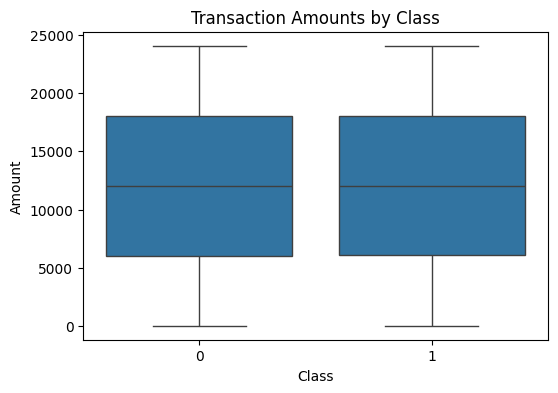

In [6]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title("Transaction Amounts by Class")
plt.show()

The box graph compares transaction amounts between fraudulent and non-fraudulent transactions. It highlights the range, median, and outliers for each class. From the plot, we see that both fraud and non-fraud transactions share a similar spread in amounts, with many outliers on the higher end. This further confirms that transaction amount alone is not a clear differentiator between fraud and non-fraud, but extreme values may still carry some signal.

## Model

The dataset was first divided into features (X) and the target label (y), where Class indicates whether a transaction is fraudulent. To ensure proper model evaluation, the data was split into training, validation, and test sets. Specifically, 85% of the data was used for training and validation combined, while 15% was reserved as a hold-out test set to assess final model performance. The training portion was further split into 70% training and 15% validation sets. Stratification was applied in both splits to maintain the same proportion of fraudulent and non-fraudulent transactions across all subsets, ensuring a balanced representation of classes for effective training and evaluation.

In [7]:
X = data.drop('Class', axis=1)
y = data['Class']

# Split into training + temp (85% train_val, 15% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

# Split training into train + validation (70% train, 15% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1765, random_state=42, stratify=y_train_val
)

print("Training dataset:" )
display(X_train.head())
display(y_train.head())

Training dataset:


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
269365,269365,1.704534,-0.573815,0.305143,-0.557874,0.066681,0.322650,0.243992,-0.123318,1.338825,...,-0.449224,-0.139763,-0.207688,0.302484,-0.804250,-0.705860,-2.419615,-0.175715,-0.202888,4989.02
265922,265922,0.304105,-0.330429,0.367966,-1.119559,0.570845,-0.217607,0.747218,-0.169725,0.520272,...,-0.537822,-0.094942,-0.008113,0.453054,-0.003434,-3.376150,-0.631322,0.103554,0.716545,22092.20
389599,389599,-0.112894,-0.417912,0.232666,-1.094763,-0.338091,0.780323,1.638006,-0.234610,0.675458,...,-0.047068,-0.050935,0.256349,-0.007353,-0.423288,0.872865,-1.053712,0.031186,-0.233166,3788.25
308743,308743,-0.153501,0.341597,-0.342825,0.775926,2.417887,-1.231385,1.227018,-0.294436,-0.762389,...,-0.188169,-0.189865,-0.226601,-0.347487,-0.187930,1.507727,0.894233,-0.350950,0.426961,15564.49
126593,126593,-0.445523,-0.889044,2.244273,-1.602079,0.631728,0.752471,0.277665,0.004495,1.480757,...,-0.619957,-0.054168,0.763840,0.813169,-1.106579,0.523561,-1.612603,-0.051367,-0.090983,16405.85


269365    0
265922    0
389599    1
308743    1
126593    0
Name: Class, dtype: int64

In the preprocessing stage, I performed feature engineering to enhance the predictive power of the dataset. First, I applied a logarithmic transformation on the Amount feature to reduce the skew caused by extreme transaction values, making it easier for models to capture meaningful patterns. Next, I created an AmountBin feature by dividing transaction amounts into quartiles, allowing the models to differentiate between small, medium, and high-value transactions. After this, the original Amount column was dropped to avoid redundancy, leaving only the transformed and binned features for modeling. These engineered features provide additional structure and help improve model performance while retaining the essential information about transaction amounts.

In [8]:
# Log-transform the amount
X_train['LogAmount'] = np.log1p(X_train['Amount'])
X_val['LogAmount'] = np.log1p(X_val['Amount'])
X_test['LogAmount'] = np.log1p(X_test['Amount'])

# Using quartiles
X_train['AmountBin'] = pd.qcut(X_train['Amount'], q=4, labels=False)
X_val['AmountBin'] = pd.qcut(X_val['Amount'], q=4, labels=False)
X_test['AmountBin'] = pd.qcut(X_test['Amount'], q=4, labels=False)

X_train['AmountBin'] = X_train['AmountBin'].astype(int)
X_val['AmountBin'] = X_val['AmountBin'].astype(int)
X_test['AmountBin'] = X_test['AmountBin'].astype(int)

# Drop the original 'Amount' column
X_train = X_train.drop('Amount', axis=1)
X_val = X_val.drop('Amount', axis=1)
X_test = X_test.drop('Amount', axis=1)

X_train.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,LogAmount,AmountBin
269365,269365,1.704534,-0.573815,0.305143,-0.557874,0.066681,0.322650,0.243992,-0.123318,1.338825,...,-0.139763,-0.207688,0.302484,-0.804250,-0.705860,-2.419615,-0.175715,-0.202888,8.515195,0
265922,265922,0.304105,-0.330429,0.367966,-1.119559,0.570845,-0.217607,0.747218,-0.169725,0.520272,...,-0.094942,-0.008113,0.453054,-0.003434,-3.376150,-0.631322,0.103554,0.716545,10.003025,3
389599,389599,-0.112894,-0.417912,0.232666,-1.094763,-0.338091,0.780323,1.638006,-0.234610,0.675458,...,-0.050935,0.256349,-0.007353,-0.423288,0.872865,-1.053712,0.031186,-0.233166,8.239923,0
308743,308743,-0.153501,0.341597,-0.342825,0.775926,2.417887,-1.231385,1.227018,-0.294436,-0.762389,...,-0.189865,-0.226601,-0.347487,-0.187930,1.507727,0.894233,-0.350950,0.426961,9.652812,2
126593,126593,-0.445523,-0.889044,2.244273,-1.602079,0.631728,0.752471,0.277665,0.004495,1.480757,...,-0.054168,0.763840,0.813169,-1.106579,0.523561,-1.612603,-0.051367,-0.090983,9.705454,2


To further improve predictive performance, a Voting Ensemble was constructed by combining three individual models: Logistic Regression, Random Forest, and Gradient Boosting. The ensemble uses hard voting, meaning it predicts the class that receives the majority vote from the three models. This approach leverages the strengths of each model while reducing individual weaknesses, resulting in more robust predictions.

In [9]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_val_pred_lr = lr_model.predict(X_val)

In [10]:
rf_model = RandomForestClassifier(n_estimators=50, max_depth=8, random_state=42)
rf_model.fit(X_train, y_train)
y_val_pred_rf = rf_model.predict(X_val)

In [11]:
gb_model = GradientBoostingClassifier(n_estimators=50, max_depth=4, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_val_pred_gb = gb_model.predict(X_val)

In [12]:
ensemble_model = VotingClassifier(
    estimators=[('lr', lr_model), ('rf', rf_model), ('gb', gb_model)],
    voting='hard'
)
ensemble_model.fit(X_train, y_train)
y_val_pred_ensemble = ensemble_model.predict(X_val)

print("--- Voting Ensemble ---")
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_ensemble))
print("Classification Report:")
print(classification_report(y_val, y_val_pred_ensemble))
print("\n")

--- Voting Ensemble ---
Confusion Matrix:
[[42649     5]
 [   22 42633]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42654
           1       1.00      1.00      1.00     42655

    accuracy                           1.00     85309
   macro avg       1.00      1.00      1.00     85309
weighted avg       1.00      1.00      1.00     85309





After fitting the ensemble on the training set, it was evaluated on the validation set. The resulting confusion matrix and classification report demonstrate that the ensemble effectively distinguishes between fraudulent and non-fraudulent transactions, achieving near-perfect precision, recall, and F1-scores for both classes. This indicates that combining the models improved overall stability and accuracy compared to using a single model alone.